# SVM  =  Support Vector Machines
dev: mehdi sahraei

### importing_libraries

In [23]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

### Reading the data with pandas

In [24]:
cell_df = pd.read_csv("svm-loan.csv")
cell_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


- taking a look at the dataset and analyzing data

In [44]:
#value_counts shows detail and num of Classes(y)
cell_df['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0      25
1      45
2      39
3      35
4      35
       ..
412    45
413    32
414    52
415    35
416    40
Name: Age, Length: 417, dtype: int64>

- histogram

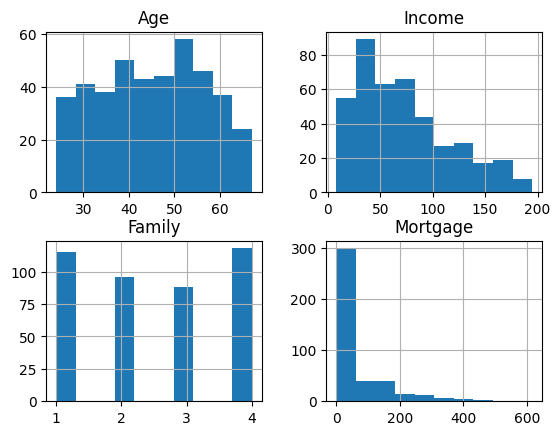

In [26]:
cell_df[['Age','Income','Family','Mortgage']].hist()
plt.show()

### scatter-plot

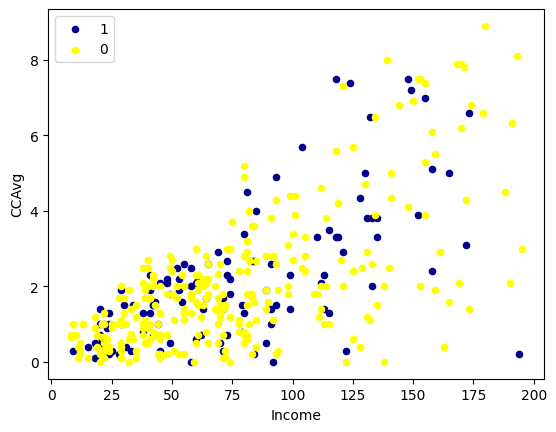

In [103]:
ax = cell_df[cell_df['CreditCard'] == 1][3:].plot(kind='scatter', x='Income', y='CCAvg', color='DarkBlue', label='1')
cell_df[cell_df['CreditCard'] == 0][3:].plot(kind='scatter', x='Income', y='CCAvg', color='Yellow', label='0', ax = ax)
plt.show()

In [104]:
ax = cell_df[cell_df['CreditCard']==1][:2]
ax

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1


### dataset preparetion
- All types of data must be integer, if not, we must clean the data

In [145]:
cell_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

- To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [148]:
feature_df = cell_df[['Age','Experience','Income','Family']]
x = np.asarray(feature_df)
x[0:5]

array([[ 25,   1,  49,   4],
       [ 45,  19,  34,   3],
       [ 39,  15,  11,   1],
       [ 35,   9, 100,   1],
       [ 35,   8,  45,   4]])

In [149]:
y = np.asarray(cell_df['CreditCard'])
y[0:5]

array([0, 0, 0, 0, 1])

### Normalizing Data

In [150]:
from sklearn import preprocessing
fitting = preprocessing.StandardScaler().fit(x)
x = fitting.transform(x)
x[0:5]

array([[-1.76, -1.65, -0.56,  1.28],
       [-0.02, -0.08, -0.9 ,  0.43],
       [-0.54, -0.43, -1.41, -1.28],
       [-0.89, -0.96,  0.59, -1.28],
       [-0.89, -1.04, -0.65,  1.28]])

### Making dataset - Train Test Split

In [151]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (333, 4) (333,)
Test set: (84, 4) (84,)


### Training Model

#### kernel functions:

- 1.Linear
- 2.Polynomial
- 3.Radial basis function (RBF)
- 4.Sigmoid

In [162]:
from sklearn import svm

clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train) 

SVC(kernel='sigmoid')

#### Prediction

In [163]:
yhat = clf.predict(X_test)
print(yhat[0:20])
print (y_test[0:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0]
[0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1]


<h2 id="evaluation">Evaluation</h2>


In [164]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [165]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.68      0.84      0.75        58
           1       0.25      0.12      0.16        26

    accuracy                           0.62        84
   macro avg       0.47      0.48      0.46        84
weighted avg       0.55      0.62      0.57        84

Confusion matrix, without normalization
[[ 3 23]
 [ 9 49]]


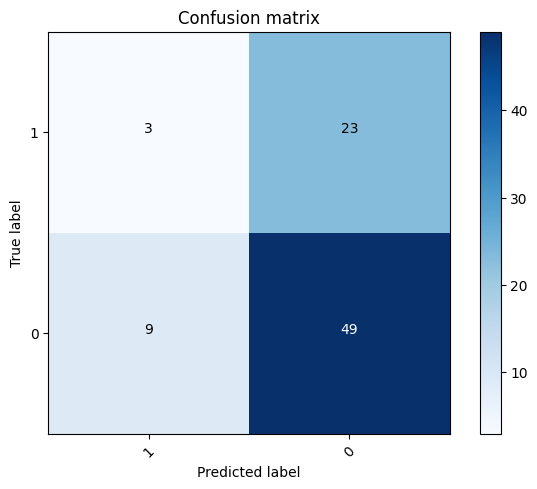

In [199]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

#### f1_score

In [169]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5693850009639483

#### jaccard index

In [174]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.08571428571428572

In [175]:
jaccard_score(y_test, yhat,pos_label=0)

0.6049382716049383